In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import r250 as gen
r_250 = gen.r250()

In [3]:
#ran3 generator definition, seed := idum

idum = -99
iff = 0
ma = np.array([0.]*56)
inext, inextp, = 0,0 

def ran3():
    MSEED = 161803398
    MBIG = 1000000000
    MZ = 0
    FAC = 1.0/MBIG
    
    global idum
    global iff
    global ma
    global inext
    global inextp
    
    rands = np.array([])

    mj, mk, ii = 0,0,0

    if idum<0 or iff==0:
        iff=1
        mj = abs(MSEED-abs(idum))
        mj %= MBIG
        ma[55] = mj
        mk = 1
        for i in range(1,55):
            ii = (21*i)%55
            ma[ii] = mk
            mk = mj-mk
            if mk<MZ: mk += MBIG
            mj = ma[ii]
        for k in range(1,5):
            for i in range(1,55):
                ma[i] -= ma[1+(i+30)%55]
                if (ma[i]<MZ): ma[i] += MBIG
        inext = 0
        inextp = 31
        idum = 1
    if (inext+1 == 56): inext = 1
    else: inext+=1
    if (inextp+1 == 56): inextp = 1
    else: inextp+=1
    mj = ma[inext] - ma[inextp]
    if (mj < MZ): mj += MBIG
    ma[inext]=mj
    rands = np.append(rands,mj*FAC)
    return rands

In [4]:
vectors = [[1,0],
           [0.5,-np.sqrt(3)/2],
           [-0.5,-np.sqrt(3)/2],
           [-1,0],
           [-0.5,np.sqrt(3)/2],
           [0.5,np.sqrt(3)/2]]

In [5]:
def bucket(vec):
    if vec[0] >= 0 and vec[1] > vec[0]/np.sqrt(3): return 0
    elif vec[1] <= vec[0]/np.sqrt(3) and vec[1] > -vec[0]/np.sqrt(3): return 1
    elif vec[1] <= -vec[0]/np.sqrt(3) and vec[0] > 0: return 2
    elif vec[0] <= 0 and vec[1] < vec[0]/np.sqrt(3): return 3
    elif vec[1] < -vec[0]/np.sqrt(3) and vec[1] >= vec[0]/np.sqrt(3): return 4
    elif vec[1] >= -vec[0]/np.sqrt(3) and vec[0] < 0: return 5
    else: return 6

In [7]:
V_r250 = np.array([])

#Zran3 = np.array([])
#V_ran3 = np.array([])

for f in range(50):
    Zr250 = np.array([])
    for j in range(100000):
        point_r250 = [0,0]
        for i in range(1000):
            point_r250 = np.add(point_r250, vectors[int(np.floor(6*r_250.random()))])
        Zr250 = np.append(Zr250, bucket(point_r250))
        if(j%10000==0): print(j)
    u_r250, c_r250 = np.unique(Zr250, return_counts=True)

    n_r250 = np.sum(c_r250[:6])
    V_r250 = np.append(V_r250, 6./n_r250 * np.sum((c_r250-float(n_r250)/6.)**2))
    print(V_r250)

#for j in range(11718):
#    point_ran3 = [0,0]
#    for i in range(1000):
#        point_ran3 = np.add(point_ran3, vectors[int(np.floor(6*ran3()))])
#    Zran3 = np.append(Zran3, bucket(point_ran3))
    

#u_ran3, c_ran3 = np.unique(Zran3, return_counts=True)
#print("r250: ", u_r250, c_r250)
#print("ran3: ",u_ran3, c_ran3)

0
10000
20000
30000
40000
[ 58.6828]
0
10000
20000
30000
40000
[ 58.6828  51.97  ]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328  58.96264]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328  58.96264  63.86824]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328  58.96264  63.86824  42.28168]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328  58.96264  63.86824  42.28168  49.9804 ]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328  58.96264  63.86824  42.28168  49.9804
  82.15816]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328  58.96264  63.86824  42.28168  49.9804
  82.15816  75.0808 ]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328  58.96264  63.86824  42.28168  49.9804
  82.15816  75.0808   49.9024 ]
0
10000
20000
30000
40000
[ 58.6828   51.97     49.29328  58.96264  63.86824  42.28168  49.9804
  82.15816  75.0808   49.9024   65.01592]
0
10000
20000
30000
40000
[ 58.6828

KeyboardInterrupt: 

In [39]:
V_r250 = np.array( [74.185,  75.64528,  62.63704,  67.84864,  63.33016,  54.23536,  68.25376,
  69.46096,  86.59816,  46.79896,  59.96104,  62.53144,  70.27336,  90.4948,
  58.76992,  50.37424,  62.38528,  53.48896,  88.44328,  61.58248,  82.77568,
  52.31776,  76.31968,  59.4136,   64.03552,  75.3784,   82.43176,  79.40464,
  56.8324,   93.06664,  62.86192,  49.00024,  60.78496,  80.57248,  77.83672,
  58.6828,   51.97,     49.29328,  58.96264,  63.86824,  42.28168,  49.9804,
  82.15816,  75.0808,   49.9024,   65.01592,  67.17088,  62.23048,  86.5744,
 88.07992])


V_ran3 = np.array([20.05552,   2.11792,  34.14976,  19.89976,  32.4208,   18.1396,   16.30312,
                  25.28512,  41.85304,   8.32,     19.33576,  19.72912,  25.80208,  32.52832,
                  23.85736,  23.31256,  18.75664,  36.18448,  37.91176,  23.0788,   17.04688,
                  33.7192,    6.75088,  37.05232,  18.49744,  37.17016,  10.88848,  31.37944,
                  20.30224,  29.42464,  10.28968,  22.29424,  20.89792,  22.9168,   30.62536,
                  20.83672,  36.12472,  33.95944,  25.61752,  44.93968,  20.98816,  17.87488,
                  39.99736,  21.06616, 32.24872, 34.0012,   40.85992,  38.66944,  43.6048, 24.33 ])

In [47]:
np.std(V_ran3)

10.007716069762843

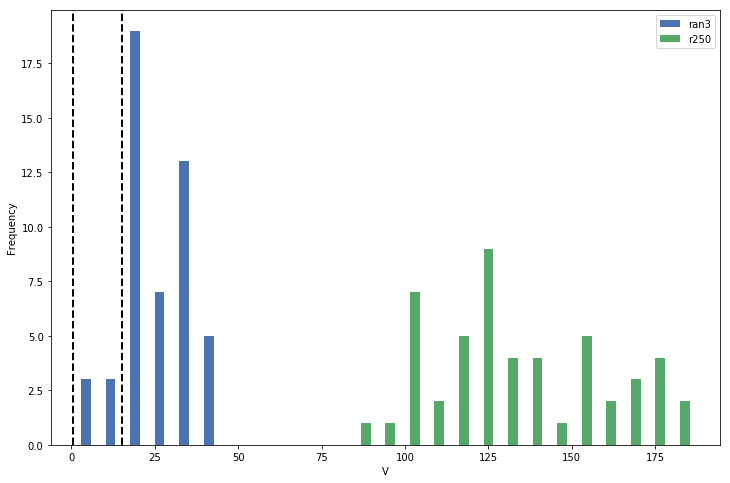

In [40]:
#plt.hist(2*(V_r250), bins=10, rwidth=0.9)
#plt.show()

plt.rcParams['figure.figsize'] = 12, 8
data = np.vstack([V_ran3, 2*(V_r250)]).T

x = np.array([15.09]*20)
x1 = np.array([0.55]*20)

plt.style.use('seaborn-deep')
plt.hist(data,bins=25, normed=False, label=['ran3','r250'])
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('V')
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=2)
plt.show()




('r250:', 50000, 66.746560000000002)


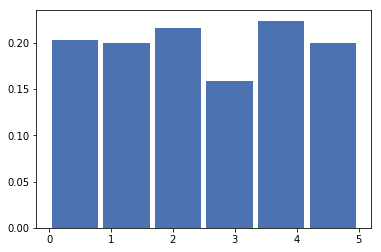

NameError: name 'c_ran3' is not defined

In [25]:
n_r250 = np.sum(c_r250[:6])
V_r250 = 6./n_r250 * np.sum((c_r250-float(n_r250)/6.)**2)
print("r250:", n_r250, V_r250)

plt.hist(Zr250,bins=6, normed=True, rwidth=0.9)
plt.show()



n_ran3 = np.sum(c_ran3[:6])
V_ran3 = 6./n_ran3 * np.sum((c_ran3-float(n_ran3)/6.)**2)
print("ran3:", n_ran3, V_ran3)

plt.hist(Zran3,bins=6, normed=True, rwidth=0.9)
plt.show()

('ran3:', 100000, 24.332240000000002)


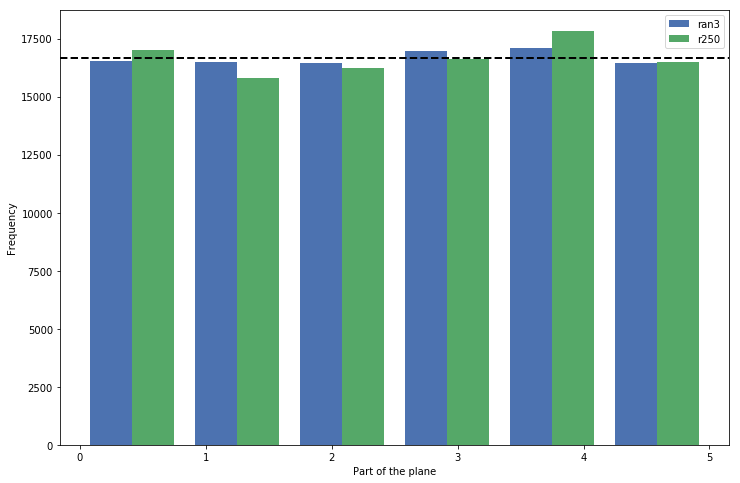

In [117]:
plt.rcParams['figure.figsize'] = 12, 8

data = np.vstack([Zran3, Zr250]).T

x = np.array([100000./6]*6)

plt.style.use('seaborn-deep')
plt.hist(data,bins=6, normed=False, label=['ran3','r250'])
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Part of the plane')

plt.axhline(x.mean(), color='k', linestyle='dashed', linewidth=2)

plt.show()

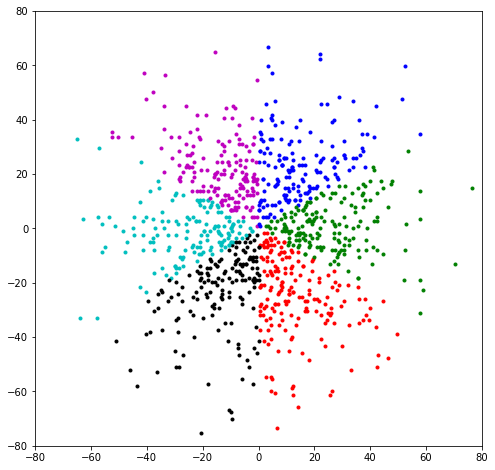

In [327]:
plt.rcParams['figure.figsize'] = 8, 8

for i in range(len(X)):
    plt.scatter(X[i],Y[i], marker='.', c=list('bgrkcm')[int(Z[i])])
    plt.xlim([-80,80])
    plt.ylim([-80,80])
plt.show()

In [7]:
X = np.array([])
Y = np.array([])
Z = np.array([])
for j in range(10000):
    directions = np.random.randint(0,6,1000)
    point = [0,0]
    for i in directions:
        point = np.add(point, vectors[i])
    Z = np.append(Z, bucket(point))
    X = np.append(X,point[0])
    Y = np.append(Y,point[1])
    #print(point)
    #plt.scatter(X[j],Y[j], marker='.', c=list('bgrkmc')[int(Z[i])] )
    #plt.xlim([-50,50])
    #plt.ylim([-50,50])
    #plt.show()
unique, counts = np.unique(Z, return_counts=True)
print(unique, counts)

(array([ 0.,  1.,  2.,  3.,  4.,  5.]), array([1729, 1659, 1681, 1677, 1634, 1620], dtype=int64))


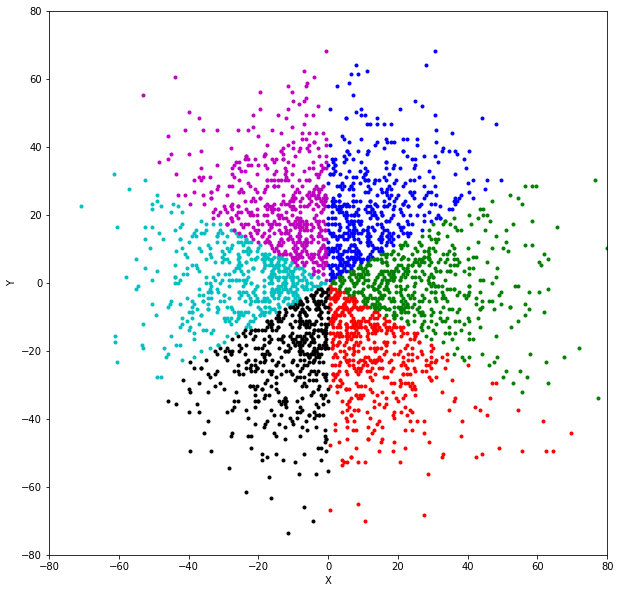

In [17]:
plt.rcParams['figure.figsize'] = 10, 10

for i in range(len(X[:3000])):
    plt.scatter(X[i],Y[i], marker='.', c=list('bgrkcm')[int(Z[i])])
    plt.xlim([-80,80])
    plt.ylim([-80,80])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()